# Deep Dive: Analyzing Connectivity
This tutorial will guide you through the process of querying and analyzing connectivity data using the CRANTpy package. We will cover how to retrieve synapse data, filter it, and visualize the results.

In [5]:
# Import CRANTpy and other necessary libraries
import crantpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import navis 

# Set up logging to see progress
cp.set_logging_level("WARNING")
navis.set_loggers('WARNING')

print("CRANTpy loaded successfully!")
print(f"Default dataset: {cp.CRANT_DEFAULT_DATASET}")

CRANTpy loaded successfully!
Default dataset: latest


## 1. Authentication Setup

Before we can access the data, we need to authenticate with the CAVE service. This is typically a one-time setup.

In [6]:
# Generate and save authentication token (uncomment if first time)
# cp.generate_cave_token(save=True)

# Test connection
try:
    client = cp.get_cave_client()
    print(f"Successfully connected to datastack: {client.datastack_name}")
    print(f"Server: {client.server_address}")
except Exception as e:
    print(f"Connection failed: {e}")
    print("Please run: cp.generate_cave_token(save=True)")

Successfully connected to datastack: kronauer_ant
Server: https://proofreading.zetta.ai


## 2. Querying Synapses

Let's start by sampling three olfactory projection neurons from the right mALT, and then use the `get_synapses()` function to find their postsynaptic partners. 
- `pre_ids=sample_ids` filters for synapses downstream of our olfacotry projection neurons 
- `threshold=3` only preserves connections between neurons with at least 3 synapses 
- `materialization='latest'` uses the most recent version of the synapse table 
- `min_size=10` thresholds on the synapse size 
- `return_pixels=True` ensures that the coordinates in the table are in pixels, not nanometers 

In [7]:
# Get a sample of olfactory projection neurons
opn_criteria = cp.NeuronCriteria(cell_class='olfactory_projection_neuron', side='right', tract='mALT')
opn_ids = opn_criteria.get_roots()
print(f"Found {len(opn_ids)} olfactory projection neurons")

# Select a few for detailed analysis
sample_ids = opn_ids[:3]
print(f"\nSample neurons for detailed analysis:")
for i, neuron_id in enumerate(sample_ids, 1):
    print(f"  {i}. {neuron_id}")

# Query synapses downstream of the sample neurons
synapses = cp.get_synapses(pre_ids=sample_ids, threshold=3, materialization='latest', min_size=10, return_pixels=True).sort_values(by=['size'], ascending=False)
synapses

Found 34 olfactory projection neurons

Sample neurons for detailed analysis:
  1. 576460752773799604
  2. 576460752722298426
  3. 576460752680204173


,pre_pt_root_id,post_pt_root_id,id,created,superceded_id,valid,size,pre_pt_supervoxel_id,post_pt_supervoxel_id,pre_pt_position,post_pt_position,ctr_pt_position
2458,576460752722298426,576460752699041619,7796505,2025-03-27 13:34:35.700037+00:00,NaN,t,403,72691531949599416,72691531949596725,"[11392, 11784, 3000]","[11374, 11786, 2998]","[11442, 11817, 3000]"
144,576460752722298426,576460752706238547,25500275,2025-03-27 13:34:35.700037+00:00,NaN,t,375,73043375402249556,73043375402302436,"[17372, 11816, 2045]","[17368, 11838, 2047]","[17374, 11836, 2052]"
2604,576460752722298426,576460752765476144,20274550,2025-03-27 13:34:35.700037+00:00,NaN,t,367,72973006725106953,72973006725115267,"[15480, 11684, 2279]","[15494, 11706, 2279]","[15502, 11701, 2277]"
2456,576460752722298426,576460752706238547,25608007,2025-03-27 13:34:35.700037+00:00,NaN,t,329,73043375468665541,73043375468668812,"[17312, 11818, 2052]","[17316, 11846, 2052]","[17332, 11844, 2055]"
2586,576460752722298426,576460752756460946,45517299,2025-03-27 13:34:35.700037+00:00,NaN,t,318,73396593378155594,73396593378158596,"[22152, 32672, 1431]","[22130, 32680, 1432]","[22148, 32678, 1435]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2250,576460752773799604,576460752640538234,100194732,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74873169177252131,74873169177252061,"[43028, 14568, 2901]","[43032, 14546, 2901]","[43020, 14556, 2902]"
2269,576460752680204173,576460752691354044,101550782,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74944087476357613,74944087476354904,"[44788, 23512, 2297]","[44784, 23488, 2296]","[44790, 23500, 2295]"
2283,576460752680204173,576460752690685237,99748640,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74803212616022221,74803212616014828,"[42274, 21310, 2499]","[42258, 21314, 2496]","[42264, 21316, 2497]"
201,576460752722298426,576460752659677339,45507925,2025-03-27 13:34:35.700037+00:00,NaN,t,10,73396593378192012,73396593378194720,"[22128, 32144, 1447]","[22108, 32136, 1447]","[22122, 32130, 1446]"


Let's first count the number of synapses for each of our root IDs

In [10]:
synapses.groupby('pre_pt_root_id').size().reset_index(name='num_synapses')

,pre_pt_root_id,num_synapses
0,576460752680204173,801
1,576460752722298426,582
2,576460752773799604,1615


Now let's plot the raw EM data centered at the three largest synapses and inspect whether we see synaptic vesicles. 

Decompressing: 100%|██████████| 9/9 [00:00<00:00, 729.57it/s]


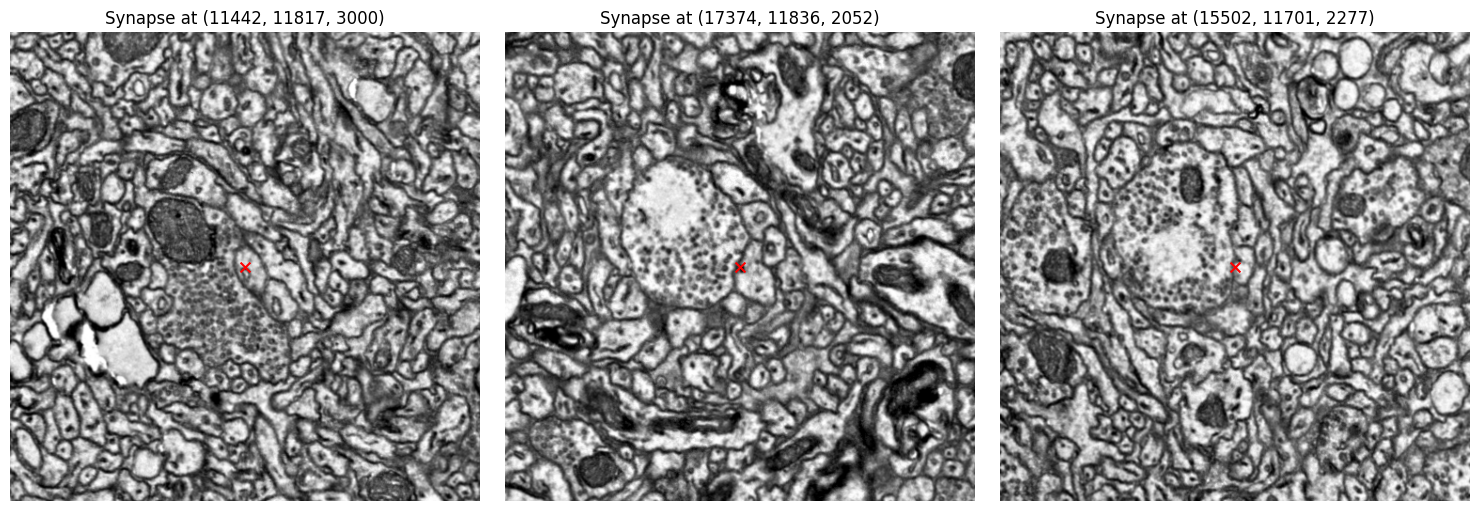

In [11]:
# Plot EM image around the detected synapses
image_size = 500
top_synapse_coords = synapses[['ctr_pt_position']].head(3).values.tolist()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, coords in zip(axes, top_synapse_coords):
    x_center, y_center, z_center = coords[0]
    img = cp.plot_em_image(x_center, y_center, z_center, size=image_size)
    ax.scatter(image_size//2, image_size//2, marker='x', color='red', s=50)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Synapse at ({x_center}, {y_center}, {z_center})")
    ax.axis('off')
plt.tight_layout()
plt.show()

The presynaptic neurons clearly have lots of vesicles! 

## 3. Querying Adjacency 

Instead of getting the full synapse table, we can get an adjacency matrix of synaptic connections between neurons using the `get_adjacency` function: 

- `post_ids=sample_ids` exclusively looks for inputs to the neurons 
- `symmetric=False` ensures that rows represent pre-synaptic neurons and columns post-synaptic neurons. 

In [12]:
# Get a sample of olfactory projection neurons
opn_criteria = cp.NeuronCriteria(cell_class='olfactory_projection_neuron', side='right', tract='mALT')
opn_ids = opn_criteria.get_roots()
sample_ids = opn_ids[:5]

# Get adjacency matrix for the sample neurons
adjacency = cp.get_adjacency(post_ids=sample_ids, threshold=3, symmetric=False)
print(f"Adjacency matrix shape: {adjacency.shape}")
print(f"Identified {adjacency.shape[0]} input neurons connected to our {adjacency.shape[1]} sample PNs.")

Adjacency matrix shape: (124, 5)
Identified 124 input neurons connected to our 5 sample PNs.


Let's sort the rows and columns and plot a heatmap to visualize our adjacency matrix. 

In [15]:
# Sort columns by the maximum connections
col_sums = adjacency.sum(axis=0)
sorted_indices = col_sums.sort_values(ascending=False).index
adjacency = adjacency[sorted_indices]

# sort rows by the location of their maximum connection
row_max_locs = adjacency.values.argmax(axis=1)
sorted_row_indices = np.argsort(row_max_locs)
adjacency = adjacency.iloc[sorted_row_indices]

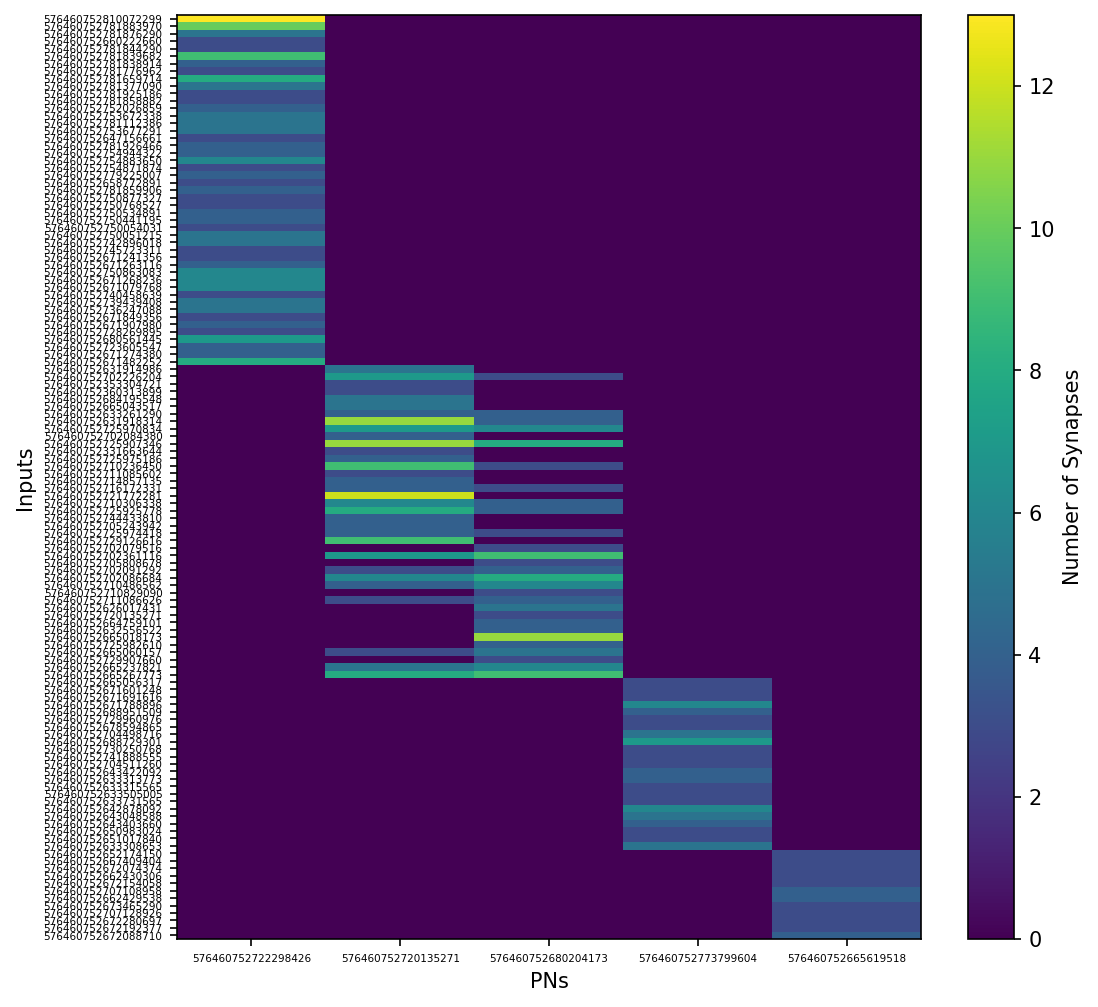

In [16]:
# Plot heatmap of connections 
plt.figure(figsize=(8, 8), dpi=150)
plt.imshow(adjacency.values, aspect='auto', cmap='viridis')
plt.colorbar(label='Number of Synapses')
plt.xlabel('PNs')
plt.ylabel('Inputs')
plt.xticks(ticks=np.arange(len(adjacency.columns)), labels=adjacency.columns, rotation=0, fontsize=5)
plt.yticks(ticks=np.arange(len(adjacency.index)), labels=adjacency.index, fontsize=5)
plt.show()

By eye, it looks like two of these PNs share the same glomerulus! 

### Querying connectivity _within_ a population of neurons

Now let's query connectivity in the central complex. \
First we will collect determine our neurons of interest using `NeuronCriteria`: 

In [17]:
# Get neurons belonging to the central complex 
cx_neurons = cp.NeuronCriteria(cell_class=['EBc', 'ER', 'FBt', 'PBt'], region='CX')
print(f"Filtered to {len(cx_neurons.get_roots())} neurons in selected classes.")
cx_annotations = cp.get_annotations(cx_neurons)
cx_annotations['cell_class'].value_counts().reset_index()

Filtered to 333 neurons in selected classes.


,cell_class,count
0,ER,137
1,FBt,91
2,PBt,64
3,EBc,47


Now when we use `get_adjacency` we restrict both `pre_ids` and `post_ids` to our predefined NeuronCriteria to only query connections **betweeen** our neurons of interest. 

In [18]:
adjacency = cp.get_adjacency(pre_ids=cx_neurons, post_ids=cx_neurons, threshold=3, symmetric=True)

And now we plot a heatmap grouped by cell class: 

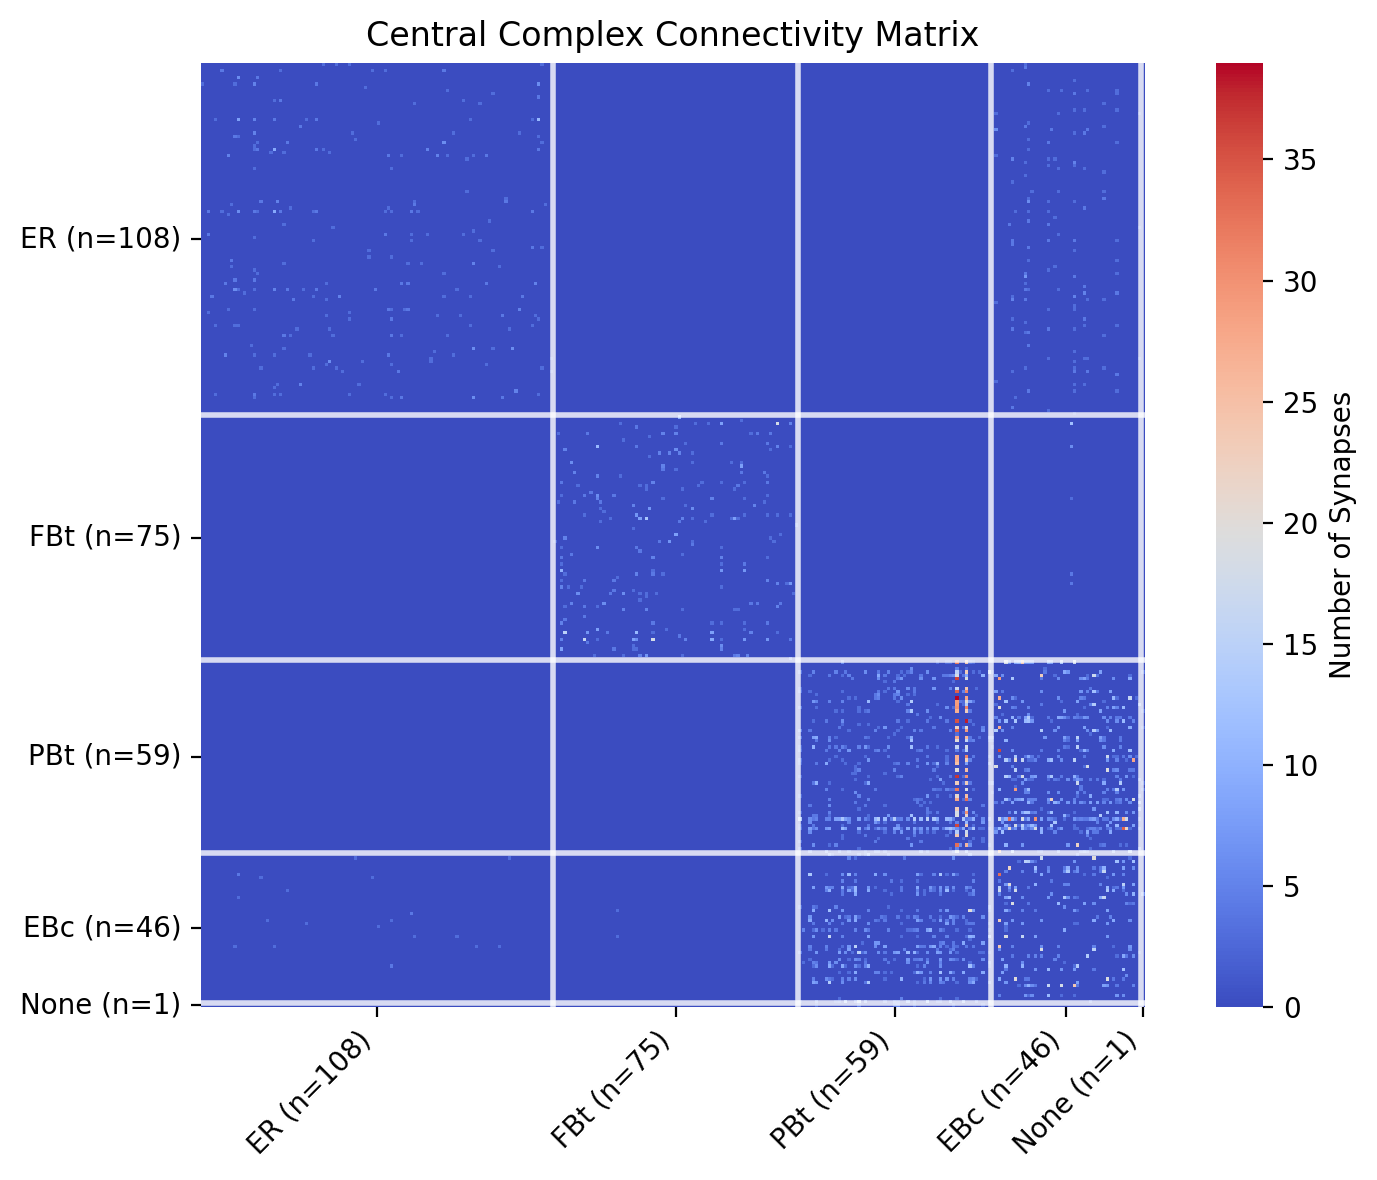

In [19]:
# Create neuron to class mapping using the existing cx_annotations
# Convert root_id to int to match adjacency matrix data type
cx_annotations_int = cx_annotations.copy()
cx_annotations_int['root_id'] = cx_annotations_int['root_id'].astype(int)
neuron_to_class = cx_annotations_int.set_index('root_id')['cell_class'].to_dict()

# Create sorted lists of neuron IDs grouped by class
class_groups = {}
for neuron_id in adjacency.index:
    cell_class = neuron_to_class.get(neuron_id, 'Unknown')
    if cell_class not in class_groups:
        class_groups[cell_class] = []
    class_groups[cell_class].append(neuron_id)

# Sort classes by number of neurons (largest first)
sorted_classes = sorted(class_groups.keys(), key=lambda x: len(class_groups[x]), reverse=True)
sorted_neuron_ids = []
for cls in sorted_classes:
    sorted_neuron_ids.extend(sorted(class_groups[cls]))

# Reorder the adjacency matrix
adjacency_sorted = adjacency.loc[sorted_neuron_ids, sorted_neuron_ids]

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6), dpi=200)
ax = sns.heatmap(adjacency_sorted.values, 
                 cmap='coolwarm', 
                 cbar_kws={'label': 'Number of Synapses'},
                 square=True)

# Add class boundaries
class_boundaries = []
current_pos = 0
for cls in sorted_classes:
    current_pos += len(class_groups[cls])
    class_boundaries.append(current_pos)

# Draw lines to separate classes
for boundary in class_boundaries[:-1]:  # Don't draw the last boundary
    ax.axhline(boundary, color='white', linewidth=2, alpha=0.8)
    ax.axvline(boundary, color='white', linewidth=2, alpha=0.8)

# Create class tick labels
class_positions = []
current_pos = 0
for cls in sorted_classes:
    class_size = len(class_groups[cls])
    class_positions.append(current_pos + class_size/2)
    current_pos += class_size

# Set tick labels to show classes instead of individual neuron IDs
ax.set_xticks(class_positions)
ax.set_xticklabels([f"{cls} (n={len(class_groups[cls])})" for cls in sorted_classes], 
                   rotation=45, ha='right', fontsize=10)
ax.set_yticks(class_positions)
ax.set_yticklabels([f"{cls} (n={len(class_groups[cls])})" for cls in sorted_classes], 
                   rotation=0, fontsize=10)

plt.title('Central Complex Connectivity Matrix')
plt.tight_layout()
plt.show()

Let's now isolate all of the EBc and PBt neurons and visualize them in the brain mesh. 

Found 47 EBc neurons and 64 PBt neurons.


Fetching meshes:   0%|          | 0/111 [00:00<?, ?it/s]

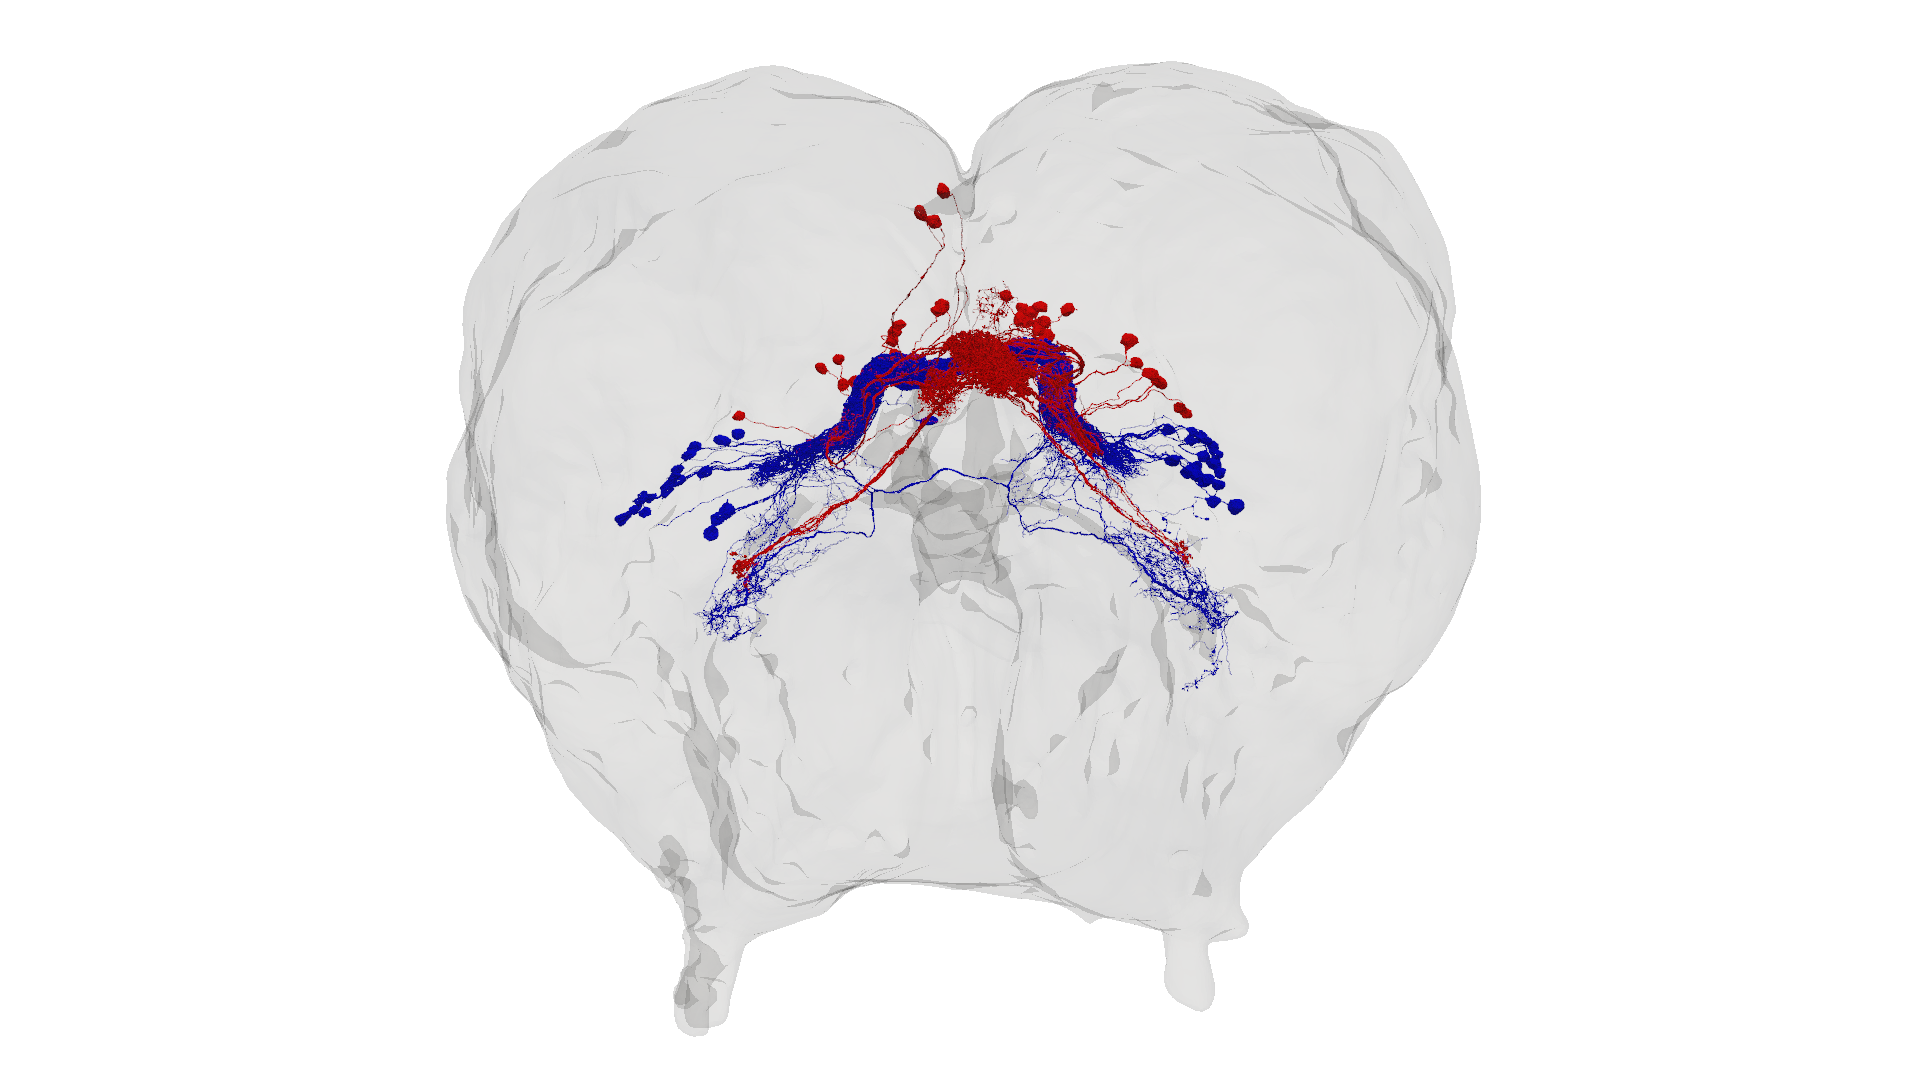

In [20]:
# Isolate neuron subtypes 
ebc_neurons = cx_annotations[cx_annotations['cell_class'] == 'EBc']['root_id'].astype(int).tolist()
pbt_neurons = cx_annotations[cx_annotations['cell_class'] == 'PBt']['root_id'].astype(int).tolist()
print(f"Found {len(ebc_neurons)} EBc neurons and {len(pbt_neurons)} PBt neurons.")
# Combine neuron IDs
combined_ids = ebc_neurons + pbt_neurons
# Define colors 
neuron_colors = ['red' for _ in ebc_neurons] + ['blue' for _ in pbt_neurons]
# Plot the brain mesh scene
plotter = cp.get_brain_mesh_scene(combined_ids, backend='static', neuron_mesh_colors=neuron_colors) 
plotter.window_size = (1920, 1080)
plotter.zoom_camera(1.5)
plotter.show()

## 4. Querying Connectivity

Another way of getting synapse information is using the `get_connectivity` function. \
This function does not take a separate `pre` and `post` inputs, but you can specify whether to include `upstream` or `downstream` connections. \
Here we query all of the synapses downstream and upstream of a single neuron and then plot the annotations for its connections. 

In [21]:
sample_id = 576460752732847432
print(f"Querying downstream connections for neuron ID {sample_id} of class {cp.get_annotations(sample_id)['cell_class'].values[0]}")
downstream_connections = cp.get_connectivity(neuron_ids=sample_id, upstream=False, downstream=True, threshold=5)
downstream_connections

Querying downstream connections for neuron ID 576460752732847432 of class PBt


,pre,post,weight
0,576460752732847432,576460752758099375,40
1,576460752732847432,576460752664985320,33
2,576460752732847432,576460752689030141,30
3,576460752732847432,576460752752135087,28
4,576460752732847432,576460752758006191,27
...,...,...,...
175,576460752732847432,576460752686098695,5
176,576460752732847432,576460752681077443,5
177,576460752732847432,576460752680886087,5
178,576460752732847432,576460752672839224,5


Now we can easily add annotations, like `post_cell_class`, to these postsynaptic partners: 

In [22]:
# Get annotations for postsynaptic neurons
annotations = cp.get_annotations(downstream_connections['post'].unique().tolist()).reset_index()
annotations['root_id'] = annotations['root_id'].astype(int)
# Add cell class to downstream connections, Fill in missing values with 'Unknown'
downstream_connections['post_cell_class'] = downstream_connections['post'].map(annotations.set_index('root_id')['cell_class'])
downstream_connections['post_cell_class'] = downstream_connections['post_cell_class'].fillna('Unknown')
downstream_connections

,pre,post,weight,post_cell_class
0,576460752732847432,576460752758099375,40,Unknown
1,576460752732847432,576460752664985320,33,EBc
2,576460752732847432,576460752689030141,30,EBc
3,576460752732847432,576460752752135087,28,Unknown
4,576460752732847432,576460752758006191,27,EBc
...,...,...,...,...
175,576460752732847432,576460752686098695,5,FBc
176,576460752732847432,576460752681077443,5,Unknown
177,576460752732847432,576460752680886087,5,Unknown
178,576460752732847432,576460752672839224,5,PBt


Now for each postsynaptic cell class, let's plot the number of connections and their average weight. 

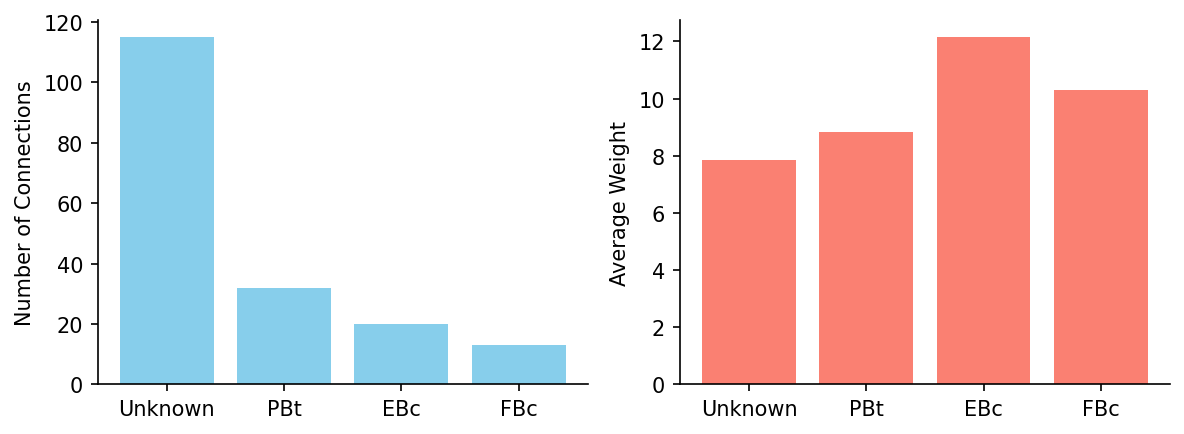

In [24]:
# Plot number of connections and average weight by cell class
summary = downstream_connections.groupby('post_cell_class').agg(
    num_connections=('post', 'count'),
    avg_weight=('weight', 'mean')
).reset_index().sort_values(by='num_connections', ascending=False)


# Plotting 
f, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)
ax[0].bar(summary['post_cell_class'], summary['num_connections'], color='skyblue')
ax[0].set_ylabel('Number of Connections')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].bar(summary['post_cell_class'], summary['avg_weight'], color='salmon')
ax[1].set_ylabel('Average Weight')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## 5. Synapse Counts 

If we don't care about the identity of the synaptic partners and just the number of connections, we can use the function `get_synapse_counts`.\
Here we sample 5 olfactory projection neurons from the left mALT tract, retrieve the synapse counts and plot the number of upstream and downstream connections. 

In [26]:
# Get a sample of olfactory projection neurons
opn_criteria = cp.NeuronCriteria(cell_class='olfactory_projection_neuron', side='left', tract='mALT')
opn_ids = opn_criteria.get_roots()

# Select a few for synapse count analysis
sample_ids = opn_ids[:5].astype(int).tolist()
synapse_counts = cp.get_synapse_counts(neuron_ids=sample_ids, threshold=5)
synapse_counts

,pre,post
neuron_id,,
576460752700282748,25,13
576460752681552812,31,3
576460752722405178,23,19
576460752742449113,29,1
576460752717978245,14,15


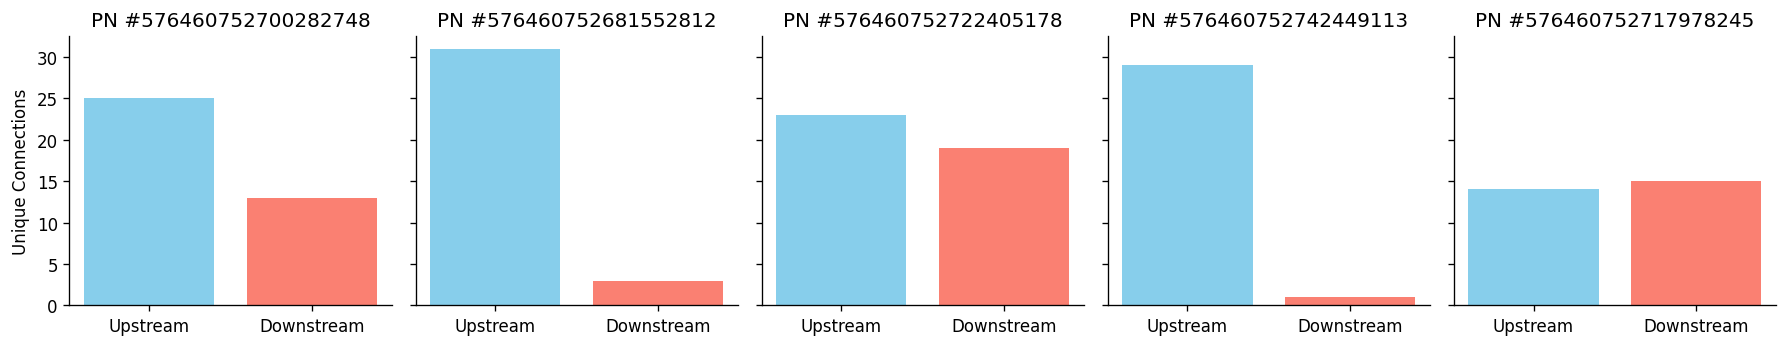

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True, dpi=120)
for ax, row in zip(axes, synapse_counts.iterrows()):
    upstream_count = row[1]['pre']
    downstream_count = row[1]['post']
    ax.bar(['Upstream', 'Downstream'], [upstream_count, downstream_count], color=['skyblue', 'salmon'])
    ax.set_title(f"PN #{row[0]}")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
axes[0].set_ylabel('Unique Connections')
plt.tight_layout()
plt.show()